## Web-Scrapping Using Beautiful-soup and Selenium

### Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from selenium import webdriver

In [ ]:
from webdriver_manager.chrome import ChromeDriverManager
browser = webdriver.Chrome(ChromeDriverManager().install())

In [ ]:
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Extracting Reviews Of Flipkart

In [ ]:
rating_ = []
review_ = []
#name_ = []
tagline_ = []
name123 = []
place123 = []
date123 = []

In [ ]:
page_num = input("Enter Page")
for i in range(9,int(page_num)+1):
    url = "https://www.flipkart.com/redmi-6a-rose-gold-32-gb/product-reviews/itm1ed294a755383?pid=MOBFAMZB7HFYJUFX&lid=LSTMOBFAMZB7HFYJUFXKGXLXM&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT&page="+str(i)
    browser.get(url)
    containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH, "//div[@class='col _2wzgFH K0kLPL']")]

    for container in containers:
        bsObj = BeautifulSoup(container)
        name31 = bsObj.find('div',{'class':"row _3n8db9"}).text
        review = bsObj.find('div', attrs = {'class':'t-ZTKy'}).text
        review = re.sub('READ MORE','', review)
        rating = bsObj.find('div',{'class':['_3LWZlK _1BLPMq','_3LWZlK _32lA32 _1BLPMq','_3LWZlK _1rdVr6 _1BLPMq']}).text
        tagline = bsObj.find('p',{'class':'_2-N8zT'}).text
        up = re.sub('Certified Buyer','', name31)
        up = re.sub('PermalinkReport Abuse','', up)
        name1 = re.findall("^[0-9A-Za-z ]+", up)[0].strip()
        place1 = re.findall("(?<=, )[A-Z a-z ]+", up)[0].strip()
        place1 = place1[:-3]
        date = re.findall("[A-Za-z]{3}, [0-9]{4}", name31)[0].strip()
        name123.append(name1)
        place123.append(place1)
        date123.append(date)
        review_.append(review)
        rating_.append(rating)
        tagline_.append(tagline)
        pass

Enter Page3


In [ ]:
len(containers)

10

In [ ]:
df = pd.DataFrame({'Comment Head':tagline_,'Rating':rating_,'Review':review_,'Name':name123,'Place':place123,
                  'Date':date123})
df.head()

,Comment Head,Rating,Review,Name,Place,Date
0,Terrible product,1,Worst,Gopi Crazy,Chennai,"Sep, 2021"
1,Utterly Disappointed,1,Don't buy this model no warranty available for...,Siva Kumar,Eluru,"Sep, 2021"
2,Awesome,5,Good amazing,Muhd Shuhail,Kuthalam,"Sep, 2021"
3,Very poor,1,I can give - value if possible... Within 2 mnt...,Ezhilarasi Manikandan,Chinnasalem,"Sep, 2021"
4,Must buy!,5,Good product,Sudhansu Singh,Betul,"Sep, 2021"


In [ ]:
df.tail()

,Comment Head,Rating,Review,Name,Place,Date
515,Mind-blowing purchase,5,Worth the price....,Mercy Mizo,Dimapur,"Dec, 2019"
516,Decent product,3,nic,ABHISHEK KUMAR,Darbhanga,"Dec, 2019"
517,Very Good,4,good phone with this range,Sunil S,Kollam District,"Dec, 2019"
518,Nice,3,Thanks,Rohit I Tiwari,Gurugram,"Dec, 2019"
519,Simply awesome,5,Nice product 😊,Suman verma Verma,Dhamtari,"Dec, 2019"


In [ ]:
df.shape

(520, 6)

In [ ]:
#Saving Reviews to a csv
#df.to_csv("flipkart_shubham.csv")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

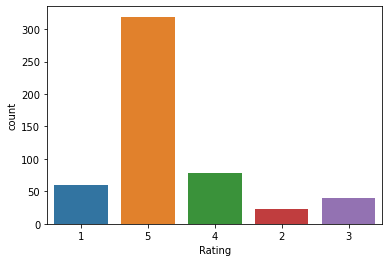

In [ ]:
sns.countplot(df['Rating'])

Most of moile phone given 5 star rating although 1 rating is quite high and 1 has greater number than 2 & 3.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


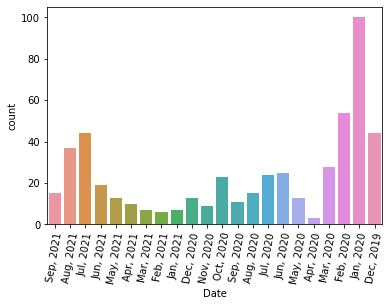

In [ ]:
date_count = sns.countplot(df['Date'])
date_count.set_xticklabels(date_count.get_xticklabels(), rotation=80)
None

Most Reviews to this mobile were Given IN jan, feb and march 2020

### Extracting Reviews Of Amazon

In [ ]:
rating_3110 = []
review_3110 = []
tagline_3110 = []
name3110 = []
place3110 = []
date3110 = []

In [ ]:
page_num = input("Enter Page")
for i in range(1,int(page_num)+1):
    url = "https://www.amazon.in/Redmi-6A-Rose-Gold-Storage/product-reviews/B07DJHZCGT/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber="+str(i)
    browser.get(url)
    containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH, "//div[@class='a-section review aok-relative']")]

    for container in containers:
        bsObj = BeautifulSoup(container)
        name3195 = bsObj.find('div',{'class':"a-row a-spacing-mini"}).text
        review3195 = bsObj.find('div', attrs = {'class':'a-row a-spacing-small review-data'}).text
        rating3195 = bsObj.find('a',{'class':['a-link-normal']}).text
        tagline3195 = bsObj.find('a',{'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'}).text
        date3195 = bsObj.find('span',{'class':'a-size-base a-color-secondary review-date'}).text
        date3195 = re.sub('Reviewed in India 🇮🇳 on','',date3195)
        rating3195 = re.sub('.0 out of 5 stars','',rating3195)
        tagline3195 = re.sub('\n','',tagline3195)
        review3195 = re.sub('\n','',review3195)
        name3110.append(name3195)
        date3110.append(date3195)
        review_3110.append(review3195)
        rating_3110.append(rating3195)
        tagline_3110.append(tagline3195)
        pass

Enter Page50


In [ ]:
name3195

'SUMAN ROY'

In [ ]:
df1 = pd.DataFrame({'Comment Head':tagline_3110,'Rating':rating_3110,'Review':review_3110,'Name':name3110,'Date':date3110})
df1.head()

,Comment Head,Rating,Review,Name,Date
0,Good,5,Superb,sandip chaudhari,24 September 2022
1,Good,5,Good,Harpal,24 September 2022
2,Battery issue,2,Battery issue,Ajinkya Jadhav,21 September 2022
3,"Great phone, I still use it.",5,Great phone for regular use. Probably disconti...,NARESH BEDI,18 September 2022
4,Good,5,Good to use,manoj kumar patri,15 September 2022


In [ ]:
df1.shape

(500, 5)

In [ ]:
#Saving Reviews to CSV file
#df1.to_csv("amazon_shubham.csv")

# Analysis

Making two different data frame name df_flipkart and df_amazon for further analysis and removing date column

In [ ]:
df_flipkart = pd.read_csv('flipkart_shubham.csv')

In [ ]:
df_flipkart.head()

,Unnamed: 0,Comment Head,Rating,Review,Name,Place,Date
0,0,Terrible product,1,Worst,Gopi Crazy,Chennai,"Sep, 2021"
1,1,Utterly Disappointed,1,Don't buy this model no warranty available for...,Siva Kumar,Eluru,"Sep, 2021"
2,2,Awesome,5,Good amazing,Muhd Shuhail,Kuthalam,"Sep, 2021"
3,3,Very poor,1,I can give - value if possible... Within 2 mnt...,Ezhilarasi Manikandan,Chinnasalem,"Sep, 2021"
4,4,Must buy!,5,Good product,Sudhansu Singh,Betul,"Sep, 2021"


<AxesSubplot:xlabel='Rating', ylabel='count'>

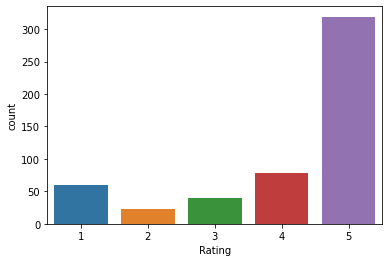

In [ ]:
sns.countplot(df_flipkart['Rating'])

<AxesSubplot:xlabel='Place', ylabel='count'>

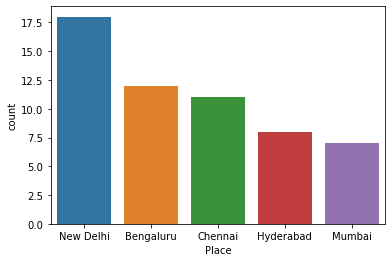

In [ ]:
sns.countplot(df_flipkart['Place'],order=df_flipkart.Place.value_counts().iloc[:5].index)

In [ ]:
df_flipkart= df_flipkart.drop(['Place','Date','Unnamed: 0'], axis=1)

In [ ]:
df_flipkart

,Comment Head,Rating,Review,Name
0,Terrible product,1,Worst,Gopi Crazy
1,Utterly Disappointed,1,Don't buy this model no warranty available for...,Siva Kumar
2,Awesome,5,Good amazing,Muhd Shuhail
3,Very poor,1,I can give - value if possible... Within 2 mnt...,Ezhilarasi Manikandan
4,Must buy!,5,Good product,Sudhansu Singh
...,...,...,...,...
515,Mind-blowing purchase,5,Worth the price....,Mercy Mizo
516,Decent product,3,nic,ABHISHEK KUMAR
517,Very Good,4,good phone with this range,Sunil S
518,Nice,3,Thanks,Rohit I Tiwari


In [ ]:
df_amazon = pd.read_csv('amazon_shubham.csv')

In [ ]:
df_amazon = df_amazon.drop(['Date','Unnamed: 0'], axis=1)

In [ ]:
df_amazon

,Comment Head,Rating,Review,Name
0,Good,5,Good,Harpal
1,Battery issue,2,Battery issue,Ajinkya Jadhav
2,"Great phone, I still use it.",5,Great phone for regular use. Probably disconti...,NARESH BEDI
3,Good,5,Good to use,manoj kumar patri
4,Battery explosion killed a women,1,Please do nit buy this phone cas lately this p...,Amir shaik
...,...,...,...,...
495,Sereen effect,1,Very bad 👎 products,Susil kumar
496,Good,5,Good,Amazon Customer
497,Good product,4,Money value,Jaydip Chauhan
498,Rocking mobile ever,5,Its rock,Rinku jain


<AxesSubplot:xlabel='Rating', ylabel='count'>

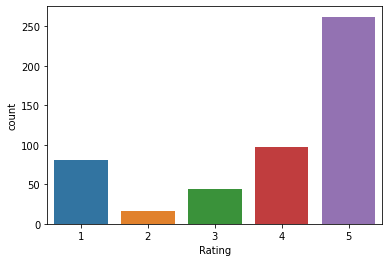

In [ ]:
sns.countplot(df_amazon['Rating'])

## Adding sentiment  

In [ ]:
#if rating is greater than 3 put 1 if rating is less than 3 put -1

In [ ]:
df_flipkart= df_flipkart[df_flipkart['Rating'] != 3]
df_flipkart['sentiment'] = df_flipkart['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [ ]:
df_flipkart

,Comment Head,Rating,Review,Name,sentiment
0,Terrible product,1,Worst,Gopi Crazy,-1
1,Utterly Disappointed,1,Don't buy this model no warranty available for...,Siva Kumar,-1
2,Awesome,5,Good amazing,Muhd Shuhail,1
3,Very poor,1,I can give - value if possible... Within 2 mnt...,Ezhilarasi Manikandan,-1
4,Must buy!,5,Good product,Sudhansu Singh,1
...,...,...,...,...,...
513,Terrific,5,I buy it for my sista Amazing one..!! she is l...,Priyu Souz,1
514,Terrific,5,Super,Kantesh Patil,1
515,Mind-blowing purchase,5,Worth the price....,Mercy Mizo,1
517,Very Good,4,good phone with this range,Sunil S,1


In [ ]:
df_amazon= df_amazon[df_amazon['Rating'] != 3]
df_amazon['sentiment'] = df_amazon['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [ ]:
df_amazon

,Comment Head,Rating,Review,Name,sentiment
0,Good,5,Good,Harpal,1
1,Battery issue,2,Battery issue,Ajinkya Jadhav,-1
2,"Great phone, I still use it.",5,Great phone for regular use. Probably disconti...,NARESH BEDI,1
3,Good,5,Good to use,manoj kumar patri,1
4,Battery explosion killed a women,1,Please do nit buy this phone cas lately this p...,Amir shaik,-1
...,...,...,...,...,...
495,Sereen effect,1,Very bad 👎 products,Susil kumar,-1
496,Good,5,Good,Amazon Customer,1
497,Good product,4,Money value,Jaydip Chauhan,1
498,Rocking mobile ever,5,Its rock,Rinku jain,1


## Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
only_reviews_flip = " ".join(df_flipkart.Review)

In [ ]:
only_reviews_flip

"Worst Don't buy this model no warranty available for low end mi mobiles Good amazing I can give - value if possible... Within 2 mnths battery bulged. When I reach service centre, they told, this imei number is not registered, it seems second hand product.. I cnt claim warranty too... Worst pdt ever I purchased.. Good product Purchase of one month,mobile speaker not working,Always hang Not gud phone charger not working Ok Good phone for just calling .Memory is less if you r game lover Very very worst product. I am lose the money. Nice Its ok Very nice Good product Don't even think of buying it...cheap cheap cheap. Nice product... I loved it It's too hanging and battery performance is too low atter vest phone The product is good and the performance is good at a ram of 2 gb. I ordered this mobile around one month ago but it's not working now It's battery get drained within 20 mnts . When I took it to service center of redme they said it's not fresh piece. It's battery is not working and 

In [ ]:
wc = WordCloud(width = 1200, height= 800, stopwords= STOPWORDS, background_color= 'Black')

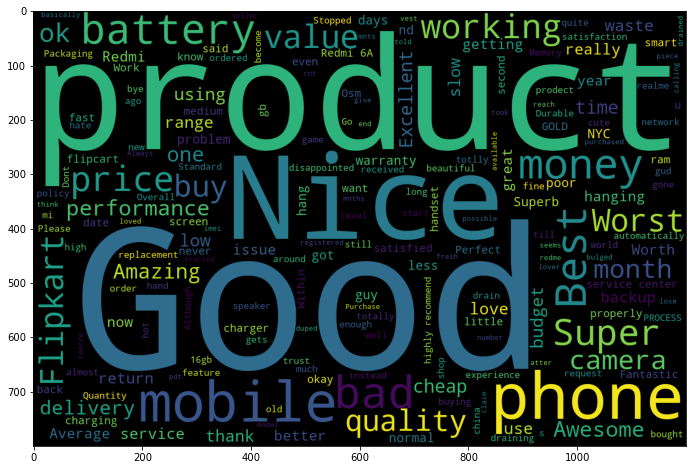

In [ ]:
# Wordcloud from flipkart

plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(only_reviews_flip))
plt.show()

In [ ]:
# replacing nan review to No Review
df_amazon = df_amazon.replace(to_replace = np.nan, value = 'No Review')

In [ ]:
only_reviews_ama = " ".join(df_amazon.Review)

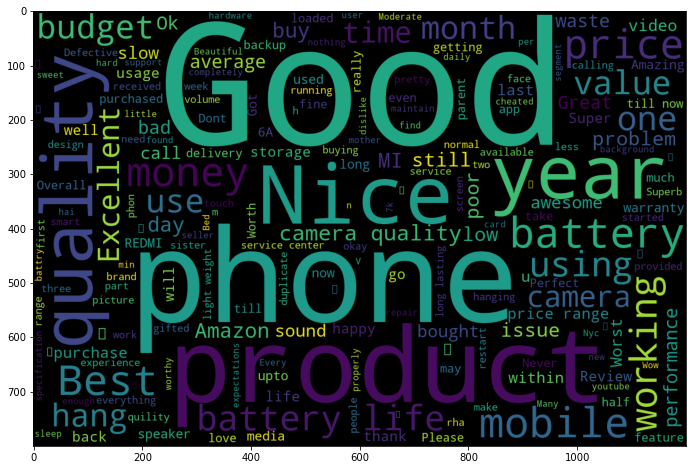

In [ ]:
#word cloud from amazon
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(only_reviews_ama))
plt.show()

## For Flipkart

Creating two dataframe positive and negative

In [ ]:
positive = df_flipkart[df_flipkart['sentiment'] == 1]
negative = df_flipkart[df_flipkart['sentiment'] == -1]

In [ ]:
positive

,Comment Head,Rating,Review,Name,sentiment
2,Awesome,5,Good amazing,Muhd Shuhail,1
4,Must buy!,5,Good product,Sudhansu Singh,1
7,Great product,5,Ok,Imran Mohammad,1
8,Good quality product,4,Good phone for just calling .Memory is less if...,Rahul Gundia,1
10,Excellent,5,Nice,Flipkart Customer,1
...,...,...,...,...,...
513,Terrific,5,I buy it for my sista Amazing one..!! she is l...,Priyu Souz,1
514,Terrific,5,Super,Kantesh Patil,1
515,Mind-blowing purchase,5,Worth the price....,Mercy Mizo,1
517,Very Good,4,good phone with this range,Sunil S,1


In [ ]:
positive.shape

(397, 5)

In [ ]:
negative.shape

(83, 5)

### Wordcloud for positive review

In [ ]:
pos = " ".join(positive.Review)

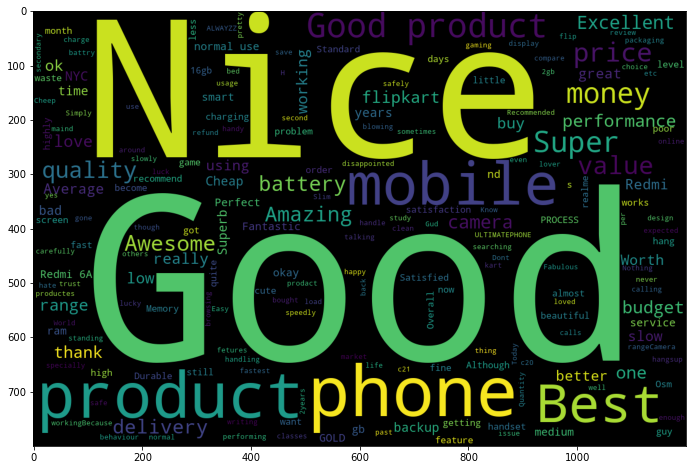

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(pos))
plt.show()

# Wordcloud for Neg review

In [ ]:
Neg = " ".join(negative.Review)

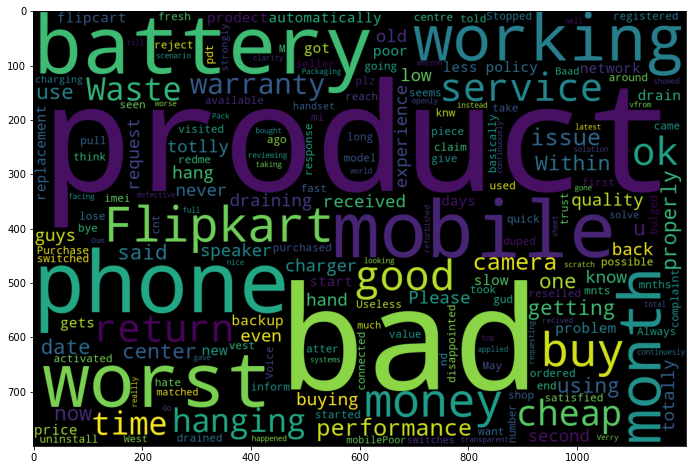

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(Neg))
plt.show()

<AxesSubplot:xlabel='sentimentt', ylabel='count'>

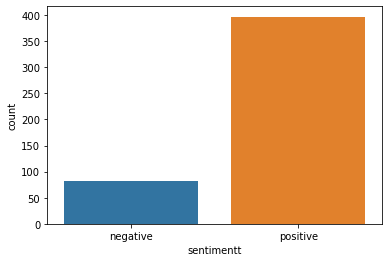

In [ ]:
df_flipkart['sentimentt'] = df_flipkart['sentiment'].replace({-1 : 'negative'})
df_flipkart['sentimentt'] = df_flipkart['sentimentt'].replace({1 : 'positive'})
sns.countplot(df_flipkart["sentimentt"])

Out of total comment 397 are positive and 83 are negetive

## for Amazon

In [ ]:
positive_ = df_amazon[df_amazon['sentiment'] == 1]
negative_ = df_amazon[df_amazon['sentiment'] == -1]

In [ ]:
positive_.shape

(359, 5)

In [ ]:
negative_.shape

(97, 5)

In [ ]:
pos_ = " ".join(positive_.Review)

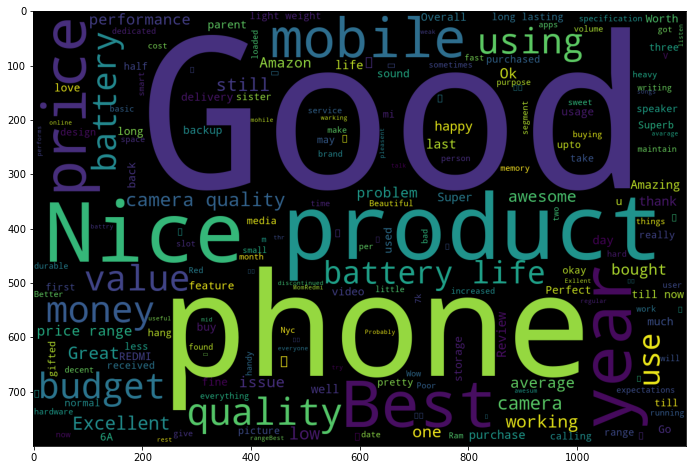

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(pos_))
plt.show()

In [ ]:
Neg_ = " ".join(negative_.Review)

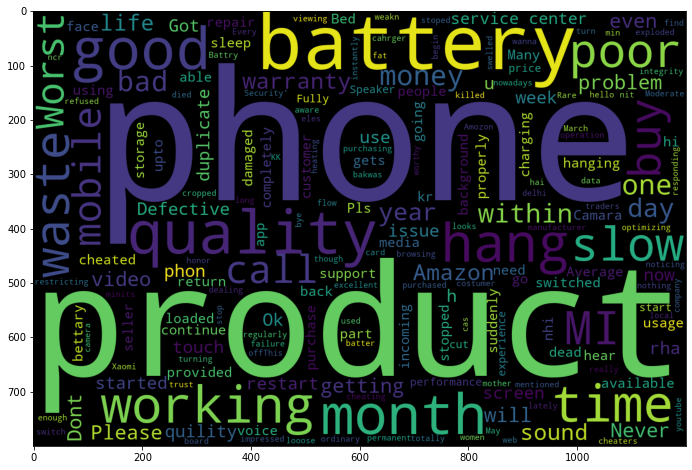

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(Neg_))
plt.show()

<AxesSubplot:xlabel='sentimentt', ylabel='count'>

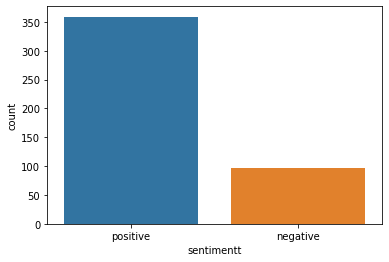

In [ ]:
df_amazon['sentimentt'] = df_amazon['sentiment'].replace({-1 : 'negative'})
df_amazon['sentimentt'] = df_amazon['sentimentt'].replace({1 : 'positive'})
sns.countplot(df_amazon["sentimentt"])

## Count_vectorizer

### Flipkart

In [ ]:
tf = CountVectorizer(token_pattern= "[a-z']+", max_df= 0.95, min_df=0.02, stop_words= STOPWORDS)

In [ ]:
tf_mat = tf.fit_transform(df_flipkart.Review)
tf_mat

<480x22 sparse matrix of type '<class 'numpy.int64'>'
	with 762 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vocab = tf.vocabulary_

In [ ]:
word_freq = tf_mat.sum(axis = 0)

In [ ]:
word_freq_new = np.array(word_freq).reshape(tf_mat.shape[1],)

In [ ]:
np.array(tf_vocab)

array({'worst': 21, 'buy': 4, 'good': 7, 'value': 19, 'battery': 2, 'product': 16, 'one': 12, 'mobile': 8, 'working': 20, 'phone': 14, 'ok': 11, 'money': 9, 'nice': 10, 'performance': 13, 'bad': 1, 'quality': 17, 'best': 3, 'camera': 5, 'flipkart': 6, 'super': 18, 'awesome': 0, 'price': 15},
      dtype=object)

In [ ]:
word_freq_new

array([ 12,  32,  28,  30,  15,  13,  17, 167,  52,  29, 100,  12,  11,
        12,  75,  20, 101,  15,  21,  17,  18,  15], dtype=int64)

In [ ]:
word_freq_dict = {}
for k,v in tf.vocabulary_.items():
    v = word_freq_new[v]
    word_freq_dict[k] = v

In [ ]:
word_freq_dict

{'worst': 15,
 'buy': 15,
 'good': 167,
 'value': 17,
 'battery': 28,
 'product': 101,
 'one': 11,
 'mobile': 52,
 'working': 18,
 'phone': 75,
 'ok': 12,
 'money': 29,
 'nice': 100,
 'performance': 12,
 'bad': 32,
 'quality': 15,
 'best': 30,
 'camera': 13,
 'flipkart': 17,
 'super': 21,
 'awesome': 12,
 'price': 20}

In [ ]:
word_freq_dict_sorted = {k: v for k , v in sorted(word_freq_dict.items(), key = lambda item: item[1], reverse= True)}

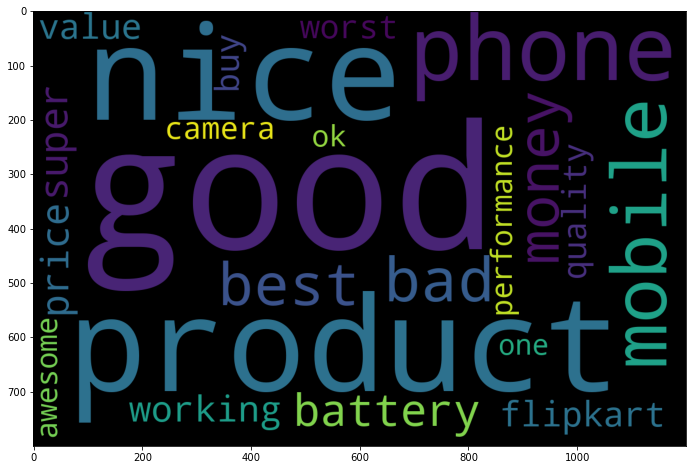

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))

### Amazon

In [ ]:
tf_mat_a = tf.fit_transform(df_amazon.Review)
tf_mat_a

<456x34 sparse matrix of type '<class 'numpy.int64'>'
	with 877 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vocab = tf.vocabulary_

In [ ]:
word_freq = tf_mat_a.sum(axis = 0)

In [ ]:
word_freq_new = np.array(word_freq).reshape(tf_mat_a.shape[1],)

In [ ]:
np.array(tf_vocab)

array({'good': 8, 'battery': 2, 'great': 9, 'phone': 18, 'use': 28, 'buy': 5, 'product': 22, 'price': 20, 'budget': 4, 'camera': 6, 'average': 1, 'nice': 15, 'mobile': 13, 'hang': 10, 'working': 32, 'problem': 21, 'range': 25, 'excellent': 7, 'using': 29, 'years': 33, 'life': 11, 'value': 30, 'money': 14, 'ok': 16, 'best': 3, 'products': 23, 'quality': 24, 'time': 27, 'low': 12, 'amazon': 0, 'poor': 19, 'waste': 31, 'still': 26, 'one': 17},
      dtype=object)

In [ ]:
word_freq_new

array([ 12,  10,  45,  26,  16,  12,  26,  13, 193,  10,  13,  24,  11,
        25,  25,  45,  10,  17,  95,  11,  31,  10,  67,  12,  46,  10,
        11,  11,  15,  18,  16,  10,  21,  29], dtype=int64)

In [ ]:
word_freq_dict = {}
for k,v in tf.vocabulary_.items():
    v = word_freq_new[v]
    word_freq_dict[k] = v

In [ ]:
word_freq_dict

{'good': 193,
 'battery': 45,
 'great': 10,
 'phone': 95,
 'use': 15,
 'buy': 12,
 'product': 67,
 'price': 31,
 'budget': 16,
 'camera': 26,
 'average': 10,
 'nice': 45,
 'mobile': 25,
 'hang': 13,
 'working': 21,
 'problem': 10,
 'range': 10,
 'excellent': 13,
 'using': 18,
 'years': 29,
 'life': 24,
 'value': 16,
 'money': 25,
 'ok': 10,
 'best': 26,
 'products': 12,
 'quality': 46,
 'time': 11,
 'low': 11,
 'amazon': 12,
 'poor': 11,
 'waste': 10,
 'still': 11,
 'one': 17}

In [ ]:
word_freq_dict_sorted = {k: v for k , v in sorted(word_freq_dict.items(), key = lambda item: item[1], reverse= True)}

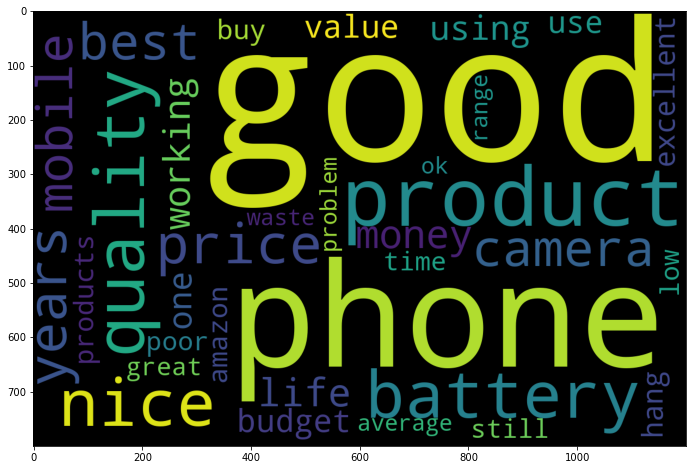

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))

## Gensim

## Flipkart

In [ ]:
df_t = df_flipkart

In [ ]:
df_t.head()

,Comment Head,Rating,Review,Name,sentiment,sentimentt
0,Terrible product,1,Worst,Gopi Crazy,-1,negative
1,Utterly Disappointed,1,Don't buy this model no warranty available for...,Siva Kumar,-1,negative
2,Awesome,5,Good amazing,Muhd Shuhail,1,positive
3,Very poor,1,I can give - value if possible... Within 2 mnt...,Ezhilarasi Manikandan,-1,negative
4,Must buy!,5,Good product,Sudhansu Singh,1,positive


In [ ]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
only_reviews_ = df_t.Review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews_]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['worst'],
 ['don',
  't',
  'buy',
  'model',
  'warranty',
  'available',
  'low',
  'end',
  'mi',
  'mobiles'],
 ['good', 'amazing'],
 ['value',
  'possible',
  'mnths',
  'battery',
  'bulged',
  'reach',
  'service',
  'centre',
  'told',
  'imei',
  'number',
  'registered',
  'second',
  'hand',
  'product',
  'cnt',
  'claim',
  'warranty',
  'too',
  'worst',
  'pdt',
  'purchased'],
 ['good', 'product'],
 ['purchase', 'month', 'mobile', 'speaker', 'working', 'always', 'hang'],
 ['gud', 'phone', 'charger', 'working'],
 ['ok'],
 ['good', 'phone', 'calling', 'memory', 'r', 'game', 'lover'],
 ['worst', 'product', 'lose', 'money'],
 ['nice'],
 ['ok'],
 ['nice'],
 ['good', 'product'],
 ['don', 't', 'think', 'buying', 'it', 'cheap', 'cheap', 'cheap'],
 ['nice', 'product', 'loved'],
 ['it',
  's',
  'hanging',
  'battery',
  'performance',
  'low',
  'atter',
  'vest',
  'phone'],
 ['product', 'good', 'performance', 'good', 'ram', 'gb'],
 ['ordered',
  'mobile',
  'month',
  'ago',

In [ ]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [ ]:
len(list(dictionaries))

467

In [ ]:
texts = tokens

In [ ]:
corpus = [dictionaries.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionaries,
                                           num_topics=8,
                                           random_state=100,

                                           chunksize=1000,
                                           passes=200,
                                           )

In [ ]:
lda_model.print_topics(num_topics= 8)

[(0,
  '0.277*"good" + 0.121*"product" + 0.055*"money" + 0.031*"value" + 0.023*"phone" + 0.016*"time" + 0.012*"bad" + 0.012*"flipkart" + 0.011*"worth" + 0.011*"performance"'),
 (1,
  '0.125*"bad" + 0.071*"good" + 0.046*"it" + 0.036*"s" + 0.024*"ok" + 0.024*"performance" + 0.024*"battery" + 0.018*"product" + 0.018*"normal" + 0.018*"use"'),
 (2,
  '0.165*"super" + 0.040*"delivery" + 0.031*"product" + 0.017*"value" + 0.017*"perfect" + 0.017*"gold" + 0.017*"very" + 0.011*"flipkart" + 0.010*"bad" + 0.009*"got"'),
 (3,
  '0.229*"nice" + 0.070*"product" + 0.030*"working" + 0.026*"mobile" + 0.025*"s" + 0.023*"it" + 0.019*"battery" + 0.019*"t" + 0.017*"don" + 0.015*"buy"'),
 (4,
  '0.144*"best" + 0.039*"excellent" + 0.036*"phone" + 0.028*"battery" + 0.022*"mobile" + 0.020*"cheap" + 0.020*"nyc" + 0.020*"redmi" + 0.017*"t" + 0.016*"don"'),
 (5,
  '0.119*"phone" + 0.081*"mobile" + 0.064*"good" + 0.038*"price" + 0.027*"worst" + 0.024*"awesome" + 0.022*"product" + 0.019*"range" + 0.016*"quality" + 0

In [ ]:
from gensim import models
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.


Perplexity:  -5.799453584394511


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionaries, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49933850442835864


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus , dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.012771 -0.224251       1        1  21.097560
0      0.235695  0.005526       2        1  21.097121
5      0.061808  0.124416       3        1  18.653383
7     -0.027446  0.120993       4        1  10.009163
4     -0.153269  0.004742       5        1   9.775596
1      0.057484 -0.031019       6        1   7.949334
6     -0.126322  0.004917       7        1   5.839774
2     -0.060720 -0.005324       8        1   5.578069, topic_info=          Term        Freq       Total Category  logprob  loglift
51        nice   80.000000   80.000000  Default  30.0000  30.0000
12        good  129.000000  129.000000  Default  29.0000  29.0000
93        best   23.000000   23.000000  Default  28.0000  28.0000
159      super   15.000000   15.000000  Default  27.0000  27.0000
79         bad   25.000000   25.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
107   flipkart    1.040037   14.062810   Topic8  -4.4769   0.2820
79         bad    0.936794   25.328057   Topic8  -4.5814  -0.4109
185  excellent    0.806234    7.620887   Topic8  -4.7315   0.6401
115       time    0.806149    6.816025   Topic8  -4.7316   0.7516
199      redmi    0.806130    6.913626   Topic8  -4.7316   0.7373

[413 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
212       4  0.519960          a
212       5  0.259980          a
212       8  0.259980          a
454       3  0.629569  according
83        5  0.650737  activated
...     ...       ...        ...
371       6  0.650738      wrost
288       1  0.432140      years
288       7  0.432140      years
166       6  0.650726        yes
337       4  0.638365         yr

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 8, 5, 2, 7, 3])

## Amazon

In [ ]:
df_t = df_amazon

In [ ]:
only_reviews_ = df_t.Review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews_]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['good'],
 ['battery', 'issue'],
 ['great', 'phone', 'regular', 'use', 'probably', 'discontinued'],
 ['good', 'use'],
 ['nit',
  'buy',
  'phone',
  'cas',
  'lately',
  'phones',
  'batter',
  'exploded',
  'killed',
  'delhi',
  'ncr',
  'women',
  'sleep',
  'wanna',
  'aware',
  'people'],
 ['ह', 'फ', 'न', 'मल', 'ख', 'प', 'छ', 'न', 'व', 'टल'],
 ['media', 'loaded'],
 ['product',
  'little',
  'issue',
  'speaker',
  'perfect',
  'price',
  'if',
  'try',
  'talk',
  'speaker',
  'phone',
  'listen',
  'songs',
  'it',
  's',
  'pleasent'],
 ['budget', 'phone'],
 ['awesum', 'purchase'],
 ['पस', 'द'],
 ['great', 'product', 'camera', 'average', 'rest', 'thr', 'phone', 'good'],
 ['nice', 'phone', 'hard', 'warking', 'phone'],
 ['moderate'],
 ['use', 'mobile', 'year', 'performs', 'good'],
 ['average', 'good'],
 ['exllent'],
 ['months',
  'min',
  'call',
  'web',
  'browsing',
  'viewing',
  'youtube',
  'videos',
  'turn',
  'phone',
  'offthis',
  'turning',
  'background',
  'apps',
 

In [ ]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [ ]:
len(list(dictionaries))

752

In [ ]:
texts = tokens

In [ ]:
corpus = [dictionaries.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionaries,
                                           num_topics=8,
                                           random_state=100,

                                           chunksize=600,
                                           passes=200,
                                           )

In [ ]:
lda_model.print_topics(num_topics= 2)

[(6,
  '0.052*"money" + 0.031*"value" + 0.029*"mobile" + 0.026*"best" + 0.021*"waste" + 0.019*"phone" + 0.011*"love" + 0.011*"like" + 0.010*"battery" + 0.007*"available"'),
 (5,
  '0.042*"phone" + 0.027*"म" + 0.023*"mi" + 0.020*"average" + 0.020*"न" + 0.013*"स" + 0.013*"त" + 0.013*"ब" + 0.013*"क" + 0.013*"ट"')]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.


Perplexity:  -6.406192933992858


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionaries, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  nan


In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus , dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.171030 -0.083671       1        1  24.406705
1     -0.057215 -0.113209       2        1  14.100498
2     -0.168669  0.147035       3        1  13.262800
5      0.147758  0.041281       4        1  11.030153
7      0.090011 -0.085226       5        1  10.012265
6      0.043857 -0.020339       6        1   9.550944
0      0.071039  0.053242       7        1   9.445739
4      0.044248  0.060887       8        1   8.190897, topic_info=        Term        Freq       Total Category  logprob  loglift
0       good  147.000000  147.000000  Default  30.0000  30.0000
58      nice   32.000000   32.000000  Default  29.0000  29.0000
42   product   48.000000   48.000000  Default  28.0000  28.0000
111    money   19.000000   19.000000  Default  27.0000  27.0000
48    budget   12.000000   12.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
39   perfect    0.789932    3.559245   Topic8  -5.4074   0.9968
200     like    0.789902    5.010587   Topic8  -5.4074   0.6547
152    worst    0.789893    6.495872   Topic8  -5.4074   0.3951
171      but    0.789887    2.974043   Topic8  -5.4074   1.1764
270     okay    0.789887    2.986626   Topic8  -5.4074   1.1721

[433 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
126       1  0.436051           a
126       2  0.218026           a
126       4  0.436051           a
392       2  0.667670  affordable
154       1  0.229955     amazing
...     ...       ...         ...
740       4  0.865627           म
741       4  0.875411           य
340       4  0.653789           र
744       4  0.653787           ल
745       4  0.782563           स

[528 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 6, 8, 7, 1, 5])

## Spacy

In [ ]:
pip install spaCy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python -m spacy download en_core_web_md

2022-09-30 16:44:42.607714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-30 16:44:42.607761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-30 16:44:47.151736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-30 16:44:47.151764: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-30 16:44:47.156460: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Shubham
2022-09-30 16:44:47.156579: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Shubham


  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.2.0
    Uninstalling smart-open-6.2.0:
      Successfully uninstalled smart-open-6.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load('en_core_web_md')

## Flipkart

In [ ]:
texts = nlp(only_reviews_flip)

In [ ]:
for token in texts:
  if token.orth_ == 'battery':
    print(" ".join(w.text for w in token.head.subtree))

Within 2 mnths battery
too hanging and battery
It 's battery get drained within 20 mnts
battery is not working
I do n't know now what to do Bad quality , , , , not working properly Worsts After 1 month of use , the phone battery started draining fast ,
battery performance
When battery is low
battery is draining ...
Very very worst phone   battery is pull off .  
good and battery
Very good camera but not good battery
This mobile is very bad battery and all systems Nice Super Got the product with full scratch on transparent sheet at the top ... very bad I love you redmi .
Camera display and battery  
after 20 days it 's battery
i am getting battery back up and applied for replacement and that has not happened this is worse scenario that i am facing
Amazing battery life ..
the battery performance
Okay with this product Good product Good Product value for money Osm Verry bad , battery backup ....
the nice mobile battery backup
the battery backup
battery Super quality
Good nice battery no b

In [ ]:
for token in texts:
    if token.dep_ == 'nsubj':
        print([w for w in token.subtree])

[I]
[I]
[they]
[it]
[I]
[cnt]
[I]
[Good, product, Purchase, of, one, month, ,, mobile, speaker, not, working]
[mobile, speaker]
[gud, phone, charger]
[I]
[Nice, Its, ok, Very, nice, Good, product]
[I]
[It]
[too, hanging, and, battery, performance]
[The, product]
[the, performance]
[I]
[it]
[It]
[I]
[they]
[it]
[It]
[battery]
[this, mobile]
[I]
[the, phone, battery]
[I]
[I]
[the, 1, -, month, -, old, phone]
[the, service, center]
[I]
[It]
[Camera]
[Battery, backup]
[I]
[I]
[this]
[I]
[The, phone]
[all]
[battery]
[This]
[Very, bad, Good, product, Cheap, product]
[Good, phone]
[Products]
[Flipkart, service]
[I]
[Very, bad, product]
[Good, Battery, quick, drain, Budget, phone, Voice, problem]
[It]
[battery]
[I]
[they]
[it]
[Flipkart]
[Good]
[it]
[it]
[it]
[we]
[you]
[it]
[Battery]
[This, product]
[plz]
[I]
[Battery]
[long, time]
[good, and, battery, performance]
[i]
[this, product]
[I]
[it]
[it]
[I]
[it]
[Good, prodact, Baad, mobile, West, mobilePoor, mobile, Best, phone, ,, value, of, mon

In [ ]:
for chunk in texts.noun_chunks:
    print(chunk)

this model
no warranty
low end mi mobiles
I
- value
2 mnths battery
I
service centre
they
this imei number
it
second hand product
I
warranty
I
Good product Purchase
one month
mobile speaker
gud phone charger
Ok Good phone
Very very worst product
I
the money
Nice Its ok Very nice Good product
it
Nice product
I
it
It
too hanging and battery performance
too low atter vest phone
The product
the performance
a ram
2 gb
I
this mobile
it
It
battery
20 mnts
I
it
service center
redme
they
it
fresh piece
It
battery
this mobile
no use
I
the seller
I
what
Bad quality
Worsts
1 month
use
the phone battery
I
the service center
I
the 1-month-old phone
warranty
the service center
us
the phone
I
it
past 5 days
Good mobile
It
the best mobile
normal uses
Camera
Battery backup
this product
I
this phone nd
this
Flipkart
u knw
I
return
my return request
this
totlly bad experience
u guys
I
my money
The phone
all
goods
fetures
battery performance
battery
second
value
money
Good Quantity
This
the first time
bad 

In [ ]:
def ent_relation(txt):
    output = []
    doc = nlp(txt)
    for token in doc:
        if token.dep_ == 'nsubj':
            words = [w for w in token.head.rights]
            for wo in words:
                if wo.dep_ in ['acomp', 'amod']:
                    output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
    return output

In [ ]:
ent_relation(only_reviews_flip)

[('I', 'lose the money'),
 ('product', 'good'),
 ('performance', 'good'),
 ('Camera', 'good'),
 ('backup', 'good'),
 ('phone', 'very pretty'),
 ('battery', 'low'),
 ('Products', 'May good'),
 ('it', 'good enough to use'),
 ('it', 'good'),
 ('product', 'very poor'),
 ('Battery', 'very poor'),
 ('performance', 'good'),
 ('mobile', 'very very hang'),
 ('Super', 'very bad I love you redmi'),
 ('You', 'very cute'),
 ('display', 'good'),
 ('I', 'happy with this product'),
 ('camera', 'very clean'),
 ('screen', 'beautiful'),
 ('It', 'good'),
 ('This', 'reallly bad'),
 ('Quality', 'good'),
 ('It', 'ok'),
 ('Packaging', 'good'),
 ('performance', 'very bad'),
 ('behaviour', 'amazing'),
 ('It', 'well'),
 ('Product', 'good'),
 ('packaging', 'very poor'),
 ('Product', 'good'),
 ('he', 'ready to delivery'),
 ('quality', 'really poor'),
 ('Camera', 'okay'),
 ('product', 'little high'),
 ('it', 'awesome'),
 ('phone', 'quite good'),
 ('It', 'good'),
 ('phone', 'nice'),
 ('it', 'so bad'),
 ('It', 'slowe

## Amazon

In [ ]:
texts = nlp(only_reviews_ama)

In [ ]:
for token in texts:
  if token.orth_ == 'battery':
    print(" ".join(w.text for w in token.head.subtree))

in daily life Very fat battery
The battery swelled in 2 months ...
the battery problem
good Good battery backup goodcamera
battery life
It has good battery back up and no hang till now .
good battery life
in a small budget Product battery
battery issue
purchase the mobile battery
Good battery life , medium camera quality .
Long battery life
battery life , camera quality or face recognition best quality and battery backup and camera quality
quality and battery
its battery life and performance
The battery life
Just after one month of purchase , the battery started to drain out .
long lasting battery backup and product
battery is not working supplier taking this is old product and
its vry good battery lso
Excellent camera quality & battery
BETTER Good battery life
yet The battery run down fastly .
battery life
After a year sound quality reduced and battery not like fresh one
battery life
with this product battery


In [ ]:
for token in texts:
    if token.dep_ == 'nsubj':
        print([w for w in token.subtree])

[this, phones, batter]
[she]
[i]
[हा]
[This, product]
[you]
[it]
[Budget, phone, awesum]
[camera]
[rest, thr, phone]
[I]
[it]
[a, 15, min, call, /, web, browsing, /, viewing, youtube, videos]
[nice, Good, phone, Hang]
[mother, board]
[I]
[It]
[the, battry, backup]
[Perfect, product, Battry, life]
[These, products]
[you]
[The, battery]
[I]
[the, battery, problem]
[Battery]
[I]
[I]
[Amazon]
[camera, completely, nothing, working, ,]
[regularly,  , screen]
[The, phone]
[the, phone]
[Xaomi]
[the, seller]
[KK, traders, "]
[I]
[Rare]
[we]
[Phone]
[it]
[Good, Nice, thi]
[a, Quality, really]
[this]
[i]
[this, mobile]
[camera, quality]
[this, everything]
[No, warranty, card, available, ,]
[which]
[Amozon]
[they]
[Nothing]
[Camera, quality]
[All, expectations]
[this]
[it]
[Ok, Very, good, Nice, phone, Good, Bed, product, Not, good]
[user, interface, ,]
[,, user, interface, ,, hardware]
[V]
[It]
[I]
[no, issues]
[Good]
[No, problem]
[Nice, Nice, Battery]
[camera]
[Perfect, Phon]
[battery, life]
[P

In [ ]:
for chunk in texts.noun_chunks:
    print(chunk)

Good Battery issue
Great phone
regular use
this phone cas
this phones batter
a delhi ncr women
she
her sleep
i
people
हा
मला
खूप
The media
This product
little issue
speaker everything
this price
you
speaker phone
songs
it
Budget phone awesum
पसंद Great Product
camera
rest thr phone
good Nice phone
phone Moderate
I
this mobile
more than 2.5 year
it
2-3 months
a 15 min call/web browsing/viewing youtube videos
the phone
offThis
all background apps
background data flow
Security' app Good product
nice Good phone Hang
slow and heating problem
mother board
1 month
permanent switch
this price range
its good
I
this phone
upto
It
good performance
the battry backup
Perfect product Battry life
good Excellent mohile phone
mid rangeBest price segment value
money
ok best phone Very useful Good budget phone
everyone
These products
i
so Many times
this company Purchase
my MomRedmi 6A Mobile phone
this Model n specification
its
budgetSuggestions
long term
you
Mobile useage
daily life Very fat battery
th

In [ ]:
def ent_relation(txt):
    output = []
    doc = nlp(txt)
    for token in doc:
        if token.dep_ == 'nsubj':
            words = [w for w in token.head.rights]
            for wo in words:
                if wo.dep_ in ['acomp', 'amod']:
                    output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
    return output

In [ ]:
ent_relation(only_reviews_ama)

[('it', 'pleasent'),
 ('camera', 'average'),
 ('it', 'good'),
 ('backup', 'very weak'),
 ('products', 'really ordinary , not worthy'),
 ('Battery', 'worst'),
 ('I', 'very impressed with their integrity'),
 ('i', 'so happy'),
 ('everything', 'fine'),
 ('expectations', 'true'),
 ('it', 'good'),
 ('It', 'enough for long time usages'),
 ('problem', 'well'),
 ('Battery', 'well'),
 ('camera', 'good'),
 ('life', 'very good'),
 ('It', 'good'),
 ('it', 'sweet and nice'),
 ('life', 'okkk'),
 ('its', 'upto the mark'),
 ('quality', 'great with good battery life'),
 ('camera', 'great with good battery life'),
 ('it', 'own'),
 ('Spacification', 'good'),
 ('awesomeBattery', 'not good'),
 ('I', 'unable to get the option to return it'),
 ('MOBILES', 'BEST'),
 ('It', 'affordable and durable'),
 ('camera', 'upto the mark'),
 ('quality', 'decent'),
 ('Ram', 'less but ideal'),
 ('quality', 'bellow'),
 ('mobile', 'very good and comfort and value of money'),
 ('it', 'normal'),
 ('they', 'pretty happy with th